# Описание тестового стенда

### Характеристики тестового стенда:

- OS: Ubuntu 22.04.4 LTS;

- CPU: AMD Ryzen 5 5600X

- CPU min frequency: 2.20 GHz;

- RAM Volume: 16Gb.

### Подготовка тестового стенда:

- обновление системы и выключение ненужных фоновых процессов;  

- привязка искомого процесса к ядру с номером 0 командой `taskset 0x1 ./MySat/bin/Release/net7.0/MySat`;

- установка частоты (минимально возможной для процессора) командой `cpupower frequency-set -f 2.20GHz`;

- сборка проекта в Release командой `dotnet build -c Release`;

- разогрев .NET машины.

# Набор входных данных

Для измерений были выбраны данные, на обработку которых при описанных настройках тестового стенда требуется около 4 секунд. Тестовый набор состоит из 75 переменных и 325 дизъюнктов и не является выполнимой булевой формулой. Для отсчета времени (в миллисекундах) используется .NET класс `Stopwatch`. Тестовые данные содержатся в файле `dataset.cnf` в репозитории [проекта](https://github.com/PolinaSavelyeva/MySat/tree/bench).

# Результаты измерения

Результаты измерений представлены в переменной `t`:

In [1]:
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
import math

m = open("result1.txt", "r")
t = [float(x.strip()) for x in m.readlines()]

### Гистограмма

(array([ 4.,  4.,  3.,  2.,  6., 15.,  1.,  2.,  2.,  1.]),
 array([3345.5687 , 3349.60632, 3353.64394, 3357.68156, 3361.71918,
        3365.7568 , 3369.79442, 3373.83204, 3377.86966, 3381.90728,
        3385.9449 ]),
 <BarContainer object of 10 artists>)

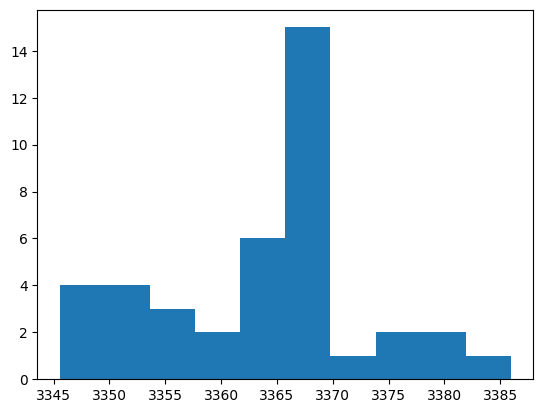

In [2]:
plt.hist(t)

### Тест на нормальность

In [3]:
stats.shapiro(t)

ShapiroResult(statistic=0.9502272787634076, pvalue=0.07720840778012539)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=0.08072364796378786, pvalue=0.9604418653757434)

Тест на нормальность пройден, p-value > 0.05.

### Среднее

In [5]:
mean = np.mean(t)
print(mean)

3363.5617750000006


### Стандартное отклонение

In [6]:
std = np.std(t, ddof=1)
print(std)

9.414765158413497


Доля стандартного отклонения от среднего составляет:

In [7]:
std/mean * 100

0.27990463051369097

### Стандартное отклонение среднего

In [8]:
std/math.sqrt(len(t))

1.4886050768091306

### Доверительный интервал 95%

In [9]:
interv = stats.t.ppf(0.975, df=len(t)-1) * stats.sem(t)
print(interv)

3.010987972382453


In [10]:
print("Интервал:", round(mean), u"\u00B1", round(interv))

Интервал: 3364 ± 3
